In [1]:
import stim

In [2]:
# steane_k = [''] * 6
# steane_k[0] = 'ZIZIZIZ'
# steane_k[1] = 'ZZIIZZI'
# steane_k[2] = 'ZZZZIII'
# steane_k[3] = 'XIXIXIX'
# steane_k[4] = 'XXIIXXI'
# steane_k[5] = 'XXXXIII'

# circuit = stim.Circuit()

# for k in steane_k:
#     mpp_str = []
#     for i, char in enumerate(k):
#         if char == 'I':
#             continue
#         mpp_str.append(f'{char}{i}')
#     mpp_str = '*'.join(mpp_str)
#     # print(mpp_str)
#     circuit.append("MPP", mpp_str)


# for k in steane_k:
#     mpp_str = []
#     for i, char in enumerate(k):
#         if char == 'I':
#             continue
#         mpp_str.append(f'{char}{i}')
#     mpp_str = '*'.join(mpp_str)
#     # print(mpp_str)
#     circuit.append("MPP", mpp_str)
# # circuit = stim.Circuit("""
# # # MPP Z0 * Z2 * Z4 * Z6
# # # MPP ZZ
# # MPP X0 * X1
# # MPP Z0 * Z1
# # X_ERROR(0.2) 0
# # M 0 1
# # DETECTOR rec[-1] rec[-2]
# # """)

# # # steane_k = [f'']
# # # circuit.append('MPP', 'XX')
# # # circuit.append('MPP', 'XX')
# # # t = stim.TableauSimulator()
# # # t.do_circuit(circ)
# # # t.canonical_stabilizers()

# # sampler = circuit.compile_detector_sampler()
# # arr = sampler.sample(shots=1000000)
# # res = { True: 0, False: 0}
# # for r in arr:
# #     b = r[0]
# #     res[b] += 1
# # res

In [3]:
# X_ERROR(0.2) 0
circuit = stim.Circuit("""
MPP X0 * X1
MPP Z0 * Z1
H 0 1
M 0 1
DETECTOR rec[-1] rec[-2]
""")

# # steane_k = [f'']
# # circuit.append('MPP', 'XX')
# # circuit.append('MPP', 'XX')
# # t = stim.TableauSimulator()
# # t.do_circuit(circ)
# # t.canonical_stabilizers()

sampler = circuit.compile_detector_sampler()
arr = sampler.sample(shots=1000000)
res = { True: 0, False: 0}
for r in arr:
    b = r[0]
    res[b] += 1
res

{True: 499992, False: 500008}

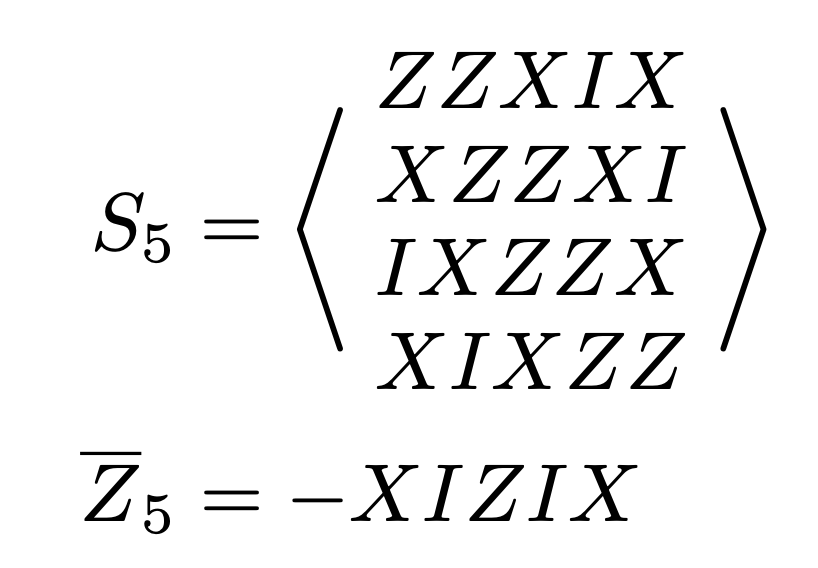

In [4]:
circuit = stim.Circuit("""
MPP Z0  * Z1  * X2  * X4 # apply X to 0
MPP Z1  * Z2  * X0  * X3 # apply Z to 3
MPP Z2  * Z3  * X1  * X4 # apply Z to 1
MPP Z3  * Z4  * X0  * X2 # apply X to 4
MPP Z2  * X0  * X4
""")
t = stim.TableauSimulator()
# t.do(circuit)
t.postselect_observable(stim.PauliString('ZZXIX'))
t.postselect_observable(stim.PauliString('XZZXI'))
t.postselect_observable(stim.PauliString('IXZZX'))
t.postselect_observable(stim.PauliString('XIXZZ'))
t.postselect_observable(stim.PauliString('-XIZIX'))
t.state_vector()

array([ 0.25+0.j,  0.  +0.j,  0.  +0.j, -0.25+0.j,  0.  +0.j,  0.25+0.j,
       -0.25+0.j,  0.  +0.j,  0.  +0.j,  0.25+0.j,  0.25+0.j,  0.  +0.j,
       -0.25+0.j,  0.  +0.j,  0.  +0.j, -0.25+0.j,  0.  +0.j, -0.25+0.j,
        0.25+0.j,  0.  +0.j,  0.25+0.j,  0.  +0.j,  0.  +0.j, -0.25+0.j,
       -0.25+0.j,  0.  +0.j,  0.  +0.j, -0.25+0.j,  0.  +0.j, -0.25+0.j,
       -0.25+0.j,  0.  +0.j], dtype=complex64)

In [5]:
t = stim.TableauSimulator()
t.h(0)
t.cx(0, 1)
t.canonical_stabilizers()

[stim.PauliString("+XX"), stim.PauliString("+ZZ")]

In [6]:
import numpy as np

Z = np.matrix([[1, 0], [0, -1]])
X = np.matrix([[0, 1], [1, 0]])
I = np.matrix([[1, 0], [0, 1]])
Y = 1/1j * Z @ X
CNOT = np.kron((I + Z) / 2, I) + np.kron((I - Z) / 2, X)
CZ = np.kron((I + Z) / 2, I) + np.kron((I - Z) / 2, Z)

ZI = np.kron(Z, I)
IZ = np.kron(I, Z)
XI = np.kron(X, I)
IX = np.kron(I, X)

CCZ = np.kron((I+Z)/2, np.kron((I+Z)/2, I)) + \
    np.kron((I-Z)/2, np.kron((I+Z)/2, I)) + \
    np.kron((I+Z)/2, np.kron((I-Z)/2, I)) + \
    np.kron((I-Z)/2, np.kron((I-Z)/2, Z))

def mkron(*paulis):
    p = paulis[0]
    for q in paulis[1:]:
        p = np.kron(p, q)
    return p

def cx(n, c, t):
    no_effect = [I] * n
    with_effect = [I] * n
    
    no_effect[c] = (I+Z)/2

    with_effect[c] = (I-Z)/2
    with_effect[t] = X

    return mkron(*no_effect) + mkron(*with_effect)

def cz(n, c, t):
    no_effect = [I] * n
    with_effect = [I] * n
    
    no_effect[c] = (I+Z)/2

    with_effect[c] = (I-Z)/2
    with_effect[t] = Z

    return mkron(*no_effect) + mkron(*with_effect)

# print(np.all(CNOT @ ZI @ CNOT == ZI))
# print(np.all(CNOT @ IZ @ CNOT == np.kron(Z, Z)))
# print(np.all(CNOT @ IX @ CNOT == IX))
# print(np.all(CNOT @ XI @ CNOT == np.kron(X, X)))


# print(np.all(CZ @ ZI @ CZ == ZI))
# print(np.all(CZ @ IZ @ CZ == IZ))
# print(np.all(CZ @ IX @ CZ == np.kron(Z, X)))
# print(np.all(CZ @ XI @ CZ == np.kron(X, Z)))

# assert (CCZ @ mkron(I, I, Z) @ CCZ == mkron(I, I, Z)).all()
# assert (CCZ @ mkron(I, Z, I) @ CCZ == mkron(I, Z, I)).all()
# assert (CCZ @ mkron(Z, I, I) @ CCZ == mkron(Z, I, I)).all()

assert (CCZ @ mkron(X, I, I) @ CCZ == mkron(X, I, I) @ mkron(I, CZ)).all()
assert (CCZ @ mkron(I, X, I) @ CCZ == mkron(I, X, I) @ cz(3, 0, 2)).all()
assert (CCZ @ mkron(I, I, X) @ CCZ == mkron(I, I, X) @ mkron(CZ, I)).all()
# (CCZ @ mkron(X, I, I) @ CCZ - mkron(X, I, I))
# (CCZ @ mkron(X, I, X) @ CCZ - mkron(X, I, X) @ mkron(X, I, X) @cz(3,0,2) @ mkron(X, I, X))
# CCZ @ mkron(X, I, X) @ CCZ 
CCZ @ mkron(X, I, X) @ CCZ - mkron(I, Z, I) @ mkron(X, I, X) @ cz(3, 1, 2) @ cz(3, 1, 0)

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

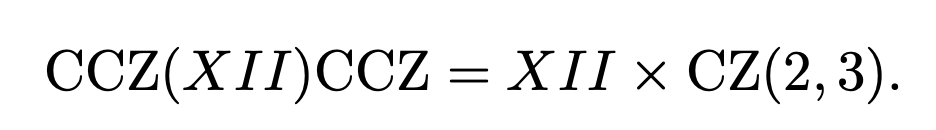

In [7]:
def mkron(*paulis):
    p = paulis[0]
    for q in paulis[1:]:
        p = np.kron(p, q)
    return p

mkron(I, I, Z)

matrix([[ 1,  0,  0,  0,  0,  0,  0,  0],
        [ 0, -1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  1,  0,  0,  0,  0,  0],
        [ 0,  0,  0, -1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  1,  0],
        [ 0,  0,  0,  0,  0,  0,  0, -1]])

In [8]:
def Rz(alpha):
    return np.matrix([[1, 0], [0, np.exp(1j * alpha)]])


b = 2
Rz(b), Rz(b).conjugate() @ X @ Rz(b)

(matrix([[ 1.        +0.j        ,  0.        +0.j        ],
         [ 0.        +0.j        , -0.41614684+0.90929743j]]),
 matrix([[ 0.        +0.j        , -0.41614684+0.90929743j],
         [-0.41614684-0.90929743j,  0.        +0.j        ]]))

In [9]:
val, vec = np.linalg.eig(Rz(b).H @ X @ Rz(b))
vec

matrix([[-0.29426025+0.64297038j,  0.29426025-0.64297038j],
        [ 0.70710678+0.j        ,  0.70710678+0.j        ]])

In [11]:
circuit = stim.Circuit("""
R 0
HERALDED_PAULI_CHANNEL_1(0, 0.1, 0, 0) 0
HERALDED_PAULI_CHANNEL_1(0, 0.1, 0, 0) 0
M 0
DETECTOR rec[-2] rec[-3] # see the event 
DETECTOR rec[-1] # is the qubit flipped?
""")
sampler = circuit.compile_detector_sampler()
# list(map(lambda x: x[0], sampler.sample(shots=10)))

qubit_flip_count = 0
total_shots = 10_000_000

for s in sampler.sample(shots=total_shots):
    if s[0] == s[1] and s[0] == True:
        qubit_flip_count += 1

print(f'qubit flip rate: {qubit_flip_count/total_shots}')

qubit flip rate: 0.1798858


In [12]:
0.9 * 0.1 * 2

0.18000000000000002

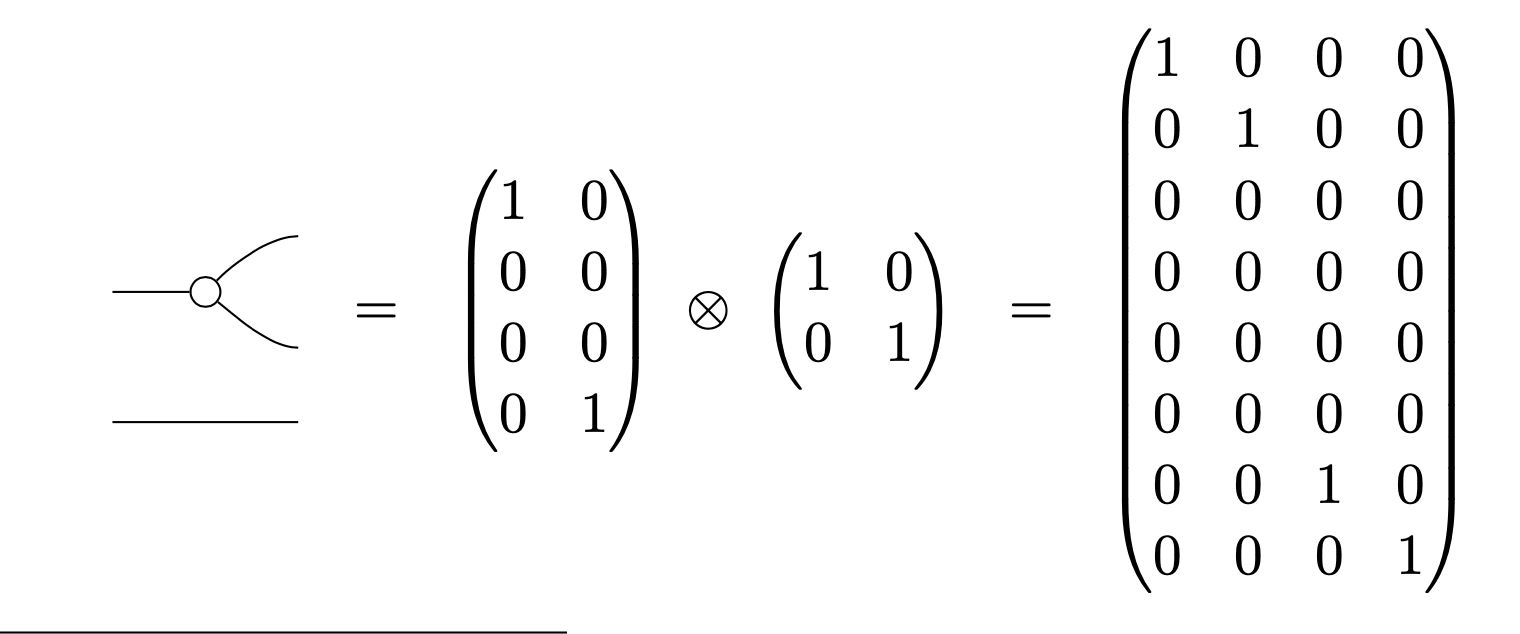

In [32]:
fp = np.kron(np.matrix([[1, 0], [0, 0], [0, 0], [0, -1]]), I)
sp = np.kron(I, np.matrix([[1, 0, 0, 1], [0, 1, 1, 0]]))
sp @ fp, np.kron(Z, I) @ CNOT

(matrix([[ 1,  0,  0,  0],
         [ 0,  1,  0,  0],
         [ 0,  0,  0, -1],
         [ 0,  0, -1,  0]]),
 matrix([[ 1.,  0.,  0.,  0.],
         [ 0.,  1.,  0.,  0.],
         [ 0.,  0.,  0., -1.],
         [ 0.,  0., -1.,  0.]]))

In [27]:
fp = np.kron(np.matrix([[1, 0], [0, 0], [0, 0], [0, 1]]), I)
sp = np.kron(I, np.matrix([[1, 0, 0, 0], [0, 0, 0, 1]]))
sp @ fp

matrix([[1, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1]])

In [29]:
np.matrix([[1],[0]]) @ np.matrix([[1, 0, 0, 0]]) + np.matrix([[0],[1]]) @ np.matrix([[0, 0, 0, 1]])

matrix([[1, 0, 0, 0],
        [0, 0, 0, 1]])

In [5]:
pays = [6, 1, 8, 5, 8, 0, 0,
        0, 6.5, 6.5, 5, 5, 0, 0,
        5, 6.5, 6.5, 5, 5, 0, 0,
        5, 6.5, 6.5, 5, 5, 0, 0,
        5, 6.5, 6.5, 5, 5, 0, 0,
        5, 8, 8]

print(sum(pays[7:]))
for i in range(0, len(pays)):
    if i + 7 > len(pays):
        break
    print(pays[i:i+7], sum(pays[i:i+7]))


128.0
[6, 1, 8, 5, 8, 0, 0] 28
[1, 8, 5, 8, 0, 0, 0] 22
[8, 5, 8, 0, 0, 0, 6.5] 27.5
[5, 8, 0, 0, 0, 6.5, 6.5] 26.0
[8, 0, 0, 0, 6.5, 6.5, 5] 26.0
[0, 0, 0, 6.5, 6.5, 5, 5] 23.0
[0, 0, 6.5, 6.5, 5, 5, 0] 23.0
[0, 6.5, 6.5, 5, 5, 0, 0] 23.0
[6.5, 6.5, 5, 5, 0, 0, 5] 28.0
[6.5, 5, 5, 0, 0, 5, 6.5] 28.0
[5, 5, 0, 0, 5, 6.5, 6.5] 28.0
[5, 0, 0, 5, 6.5, 6.5, 5] 28.0
[0, 0, 5, 6.5, 6.5, 5, 5] 28.0
[0, 5, 6.5, 6.5, 5, 5, 0] 28.0
[5, 6.5, 6.5, 5, 5, 0, 0] 28.0
[6.5, 6.5, 5, 5, 0, 0, 5] 28.0
[6.5, 5, 5, 0, 0, 5, 6.5] 28.0
[5, 5, 0, 0, 5, 6.5, 6.5] 28.0
[5, 0, 0, 5, 6.5, 6.5, 5] 28.0
[0, 0, 5, 6.5, 6.5, 5, 5] 28.0
[0, 5, 6.5, 6.5, 5, 5, 0] 28.0
[5, 6.5, 6.5, 5, 5, 0, 0] 28.0
[6.5, 6.5, 5, 5, 0, 0, 5] 28.0
[6.5, 5, 5, 0, 0, 5, 6.5] 28.0
[5, 5, 0, 0, 5, 6.5, 6.5] 28.0
[5, 0, 0, 5, 6.5, 6.5, 5] 28.0
[0, 0, 5, 6.5, 6.5, 5, 5] 28.0
[0, 5, 6.5, 6.5, 5, 5, 0] 28.0
[5, 6.5, 6.5, 5, 5, 0, 0] 28.0
[6.5, 6.5, 5, 5, 0, 0, 5] 28.0
[6.5, 5, 5, 0, 0, 5, 8] 29.5
[5, 5, 0, 0, 5, 8, 8] 31


In [2]:
import numpy as np

1 / np.e

0.36787944117144233

In [1]:
cnot_fix_table = """
1	0.978288	0.959938	0.941415	0.922397	0.899963	0.882116	0.860784	0.839411	0.822707	0.801076	0.780486	0.758892	0.739339	0.720116	0.696515	0.674025	0.658612	0.642007	0.626294	0.601619	0.581676	0.556697	0.539559	0.51465	0.499312	0.480029	0.464	0.439734	0.414633	0.387694	0.376655	0.351982	0.332711	0.316866	0.298501	0.278403	0.257571	0.237959	0.221346
0.816789	0.801341	0.788194	0.767093	0.753478	0.744996	0.729782	0.71736	0.693424	0.688463	0.670639	0.654134	0.631634	0.61697	0.605819	0.590357	0.574359	0.559432	0.545456	0.525055	0.512518	0.503535	0.492829	0.480106	0.465369	0.443544	0.429352	0.407	0.393246	0.376369	0.358164	0.346094	0.331459	0.316227	0.299233	0.277581	0.268104	0.247862	0.234972	0.217658
"""

new_table = """
0.000	0.025	0.050	0.075	0.100	0.125	0.150	0.175	0.200	0.225	0.250	0.275	0.300	0.325	0.350	0.375	0.400	0.425	0.450	0.475	0.500	0.525	0.550	0.575	0.600	0.625	0.650	0.675	0.700	0.725	0.750	0.775	0.800	0.825	0.850	0.875	0.900	0.925	0.950	0.975
1	0.980099	0.959256	0.942812	0.925562	0.904592	0.884471	0.866435	0.846636	0.828115	0.811269	0.792307	0.768584	0.742836	0.722048	0.707507	0.68935	0.673101	0.656636	0.636728	0.615125	0.592328	0.572697	0.550529	0.529768	0.514199	0.492884	0.474	0.455433	0.43671	0.414961	0.397181	0.373411	0.348384	0.33004	0.311986	0.29265	0.272611	0.251819	0.233993
0.323641	0.320915	0.318852	0.316846	0.310237	0.314008	0.310796	0.312329	0.311211	0.311929	0.306266	0.304201	0.299352	0.295145	0.293316	0.294667	0.289302	0.285615	0.284121	0.279051	0.277497	0.27757	0.27667	0.274464	0.268363	0.266382	0.263768	0.265	0.264162	0.261186	0.25936	0.257736	0.253865	0.24757	0.248835	0.249394	0.245435	0.24768	0.247386	0.2464
0.816789	0.802215	0.786791	0.771442	0.75784	0.743002	0.730063	0.717517	0.706074	0.692554	0.673952	0.658507	0.642781	0.625663	0.608047	0.592957	0.578573	0.565015	0.553811	0.541504	0.523405	0.505223	0.491699	0.479153	0.465955	0.44656	0.434042	0.416	0.401824	0.385701	0.370631	0.353696	0.33467	0.31728	0.305139	0.289088	0.276601	0.259909	0.245902	0.229442
0.977433	0.958915	0.938803	0.919106	0.902673	0.884406	0.867677	0.850065	0.837218	0.819895	0.796782	0.775904	0.755294	0.735273	0.715667	0.695529	0.677698	0.656757	0.639974	0.621756	0.598055	0.577884	0.560021	0.542923	0.524514	0.501985	0.48928	0.468	0.447904	0.428527	0.411154	0.388267	0.365407	0.344933	0.32485	0.303542	0.284373	0.268581	0.251157	0.230003
1	0.948396	0.899308	0.854957	0.810211	0.766444	0.723325	0.678287	0.638758	0.600318	0.564382	0.525418	0.488499	0.456656	0.424554	0.390663	0.361611	0.333001	0.306173	0.28098	0.260733	0.237566	0.214595	0.190858	0.170037	0.152598	0.133225	0.115	0.099021	0.084431	0.070787	0.056467	0.044023	0.034059	0.02696	0.01673	0.010434	0.007971	0.002316	0.000197
0.323641	0.321818	0.318432	0.30025	0.311644	0.299658	0.297244	0.297509	0.289047	0.288407	0.282722	0.276861	0.282359	0.272433	0.276767	0.270535	0.261981	0.254472	0.253409	0.245631	0.240621	0.23628	0.244957	0.240223	0.247605	0.240487	0.234532	0.236	0.225233	0.242827	0.219982	0.225354	0.224819	0.221663	0.230581	0.229252	0.231695	0.229611	0.22131	0.222677
0.816789	0.78097	0.738666	0.70219	0.670871	0.6369	0.613712	0.579759	0.551412	0.527517	0.493334	0.469515	0.435054	0.411021	0.385076	0.360624	0.324773	0.309176	0.284745	0.256547	0.237858	0.230027	0.211234	0.197195	0.177739	0.16952	0.151081	0.147	0.132949	0.122802	0.112249	0.099919	0.080618	0.088168	0.078125	0.069133	0.065497	0.060629	0.058253	0.058318
0.977433	0.928712	0.884351	0.839045	0.791898	0.751642	0.709496	0.670591	0.630882	0.594739	0.560291	0.524398	0.483858	0.449084	0.423182	0.391508	0.347638	0.329225	0.294537	0.265589	0.23866	0.228996	0.200678	0.18294	0.15751	0.147403	0.125352	0.112	0.099871	0.085358	0.074488	0.057668	0.041894	0.046494	0.026421	0.02338	0.013434	0.004154	0.00402	0.006973
"""

previous_table = """
0.000       0.025   0.050   0.075   0.100   0.125   0.150   0.175   0.200   0.225   0.250   0.275   0.300   0.325   0.350   0.375   0.400   0.425   0.450   0.475   0.500
1           0.980099    0.959256    0.942812    0.925562    0.904592    0.884471    0.866435    0.846636    0.828115    0.811269    0.792307    0.768584    0.742836    0.722048    0.707507    0.68935 0.673101    0.656636    0.636728    0.615125
0.323731    0.321183    0.319125    0.317119    0.310686    0.31428 0.311428    0.31296 0.311666    0.312384    0.306902    0.304655    0.299624    0.295417    0.293952    0.295299    0.289933    0.286247    0.284575    0.279324    0.277588
0.977433    0.958915    0.938803    0.919106    0.902673    0.884406    0.867677    0.850065    0.837218    0.819895    0.796782    0.775904    0.755294    0.735273    0.715667    0.695529    0.677698    0.656757    0.639974    0.621756    0.598055
1           0.948396    0.899308    0.854957    0.810211    0.766444    0.723325    0.678287    0.638758    0.600318    0.564382    0.525418    0.488499    0.456656    0.424554    0.390663    0.361611    0.333001    0.306173    0.28098 0.260733
0.323731    0.321991    0.318703    0.300339    0.311287    0.299568    0.297334    0.297509    0.289227    0.288317    0.282722    0.276773    0.282091    0.272344    0.276585    0.270625    0.262073    0.254472    0.25314 0.245717    0.240708
0.977433    0.928712    0.884351    0.839045    0.791898    0.751642    0.709496    0.670591    0.630882    0.594739    0.560291    0.524398    0.483858    0.449084    0.423182    0.391508    0.347638    0.329225    0.294537    0.265589    0.23866
"""

sequence_table = """
0.000	0.025	0.050	0.075	0.100	0.125	0.150	0.175	0.200	0.225	0.250	0.275	0.300	0.325	0.350	0.375	0.400	0.425	0.450	0.475	0.500	0.525	0.550	0.575	0.600	0.625	0.650	0.675	0.700	0.725	0.750	0.775	0.800	0.825	0.850	0.875	0.900	0.925	0.950	0.975
0.8601515285944642	0.8315275366457313	0.826272	0.8157405345958902	0.8001589238907968	0.7933211578835346	0.7647248700548462	0.7486832650640358	0.7380442988996063	0.7196366720541556	0.7114725478924232	0.6945965812541048	0.6812151099076091	0.6635826403402028	0.641325	0.6297374535525745	0.615988	0.5958080487061749	0.5854169712307071	0.5706533254687097	0.5579361448163865	0.5371694999974852	0.5247698360449445	0.5099671493740672	0.5005166739846836	0.47895647754089876	0.46635626542670006	0.4457440532722376	0.433659	0.4159011829795247	0.4020030327120249	0.388369	0.36853643354318755	0.358335	0.34352210117173343	0.32340746009987525	0.31212927169804705	0.2959638324046217	0.28084390986676694	0.26491877713924095
0.8682520326475804	0.8144906302792252	0.7803614799633033	0.739323	0.7167084398241629	0.6640629160442755	0.6339071850901076	0.6011995271978288	0.5622218212365023	0.5408714531831031	0.5033647296309179	0.47064	0.44565947377977116	0.4128889929423242	0.3897095075379797	0.36478176414511304	0.33937757379249367	0.31516103317253785	0.2929282021346779	0.27061898625276365	0.24999999999999992	0.23080164509145262	0.21134682453983294	0.19498591646038427	0.17836691605832541	0.1614872646625334	0.1457432774130043	0.13234974054185009	0.11662130214344703	0.10443922689147529	0.099461	0.088758	0.079002	0.069321	0.064044784	0.060526267	0.055042779	0.050146426270047145	0.051658469	0.050074358308241085
"""

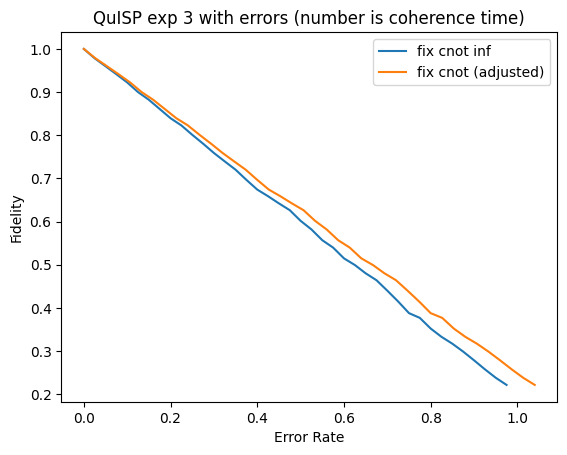

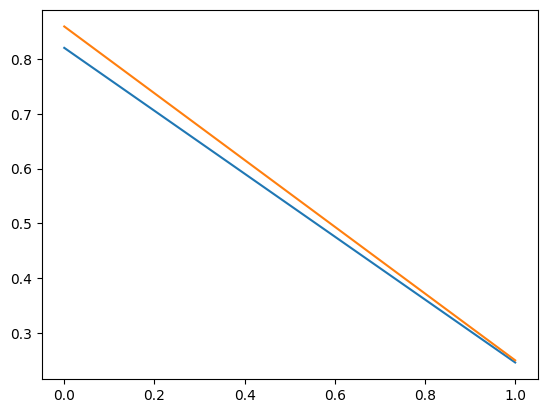

In [10]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'error rate': [],
    'quisp to sequence error rate': [],
    'cnot inf': [],
    'cnot 1ms': [],
    'cnot 10ms': [],
    'cnot 100ms': [],
    'new cnot inf': [],
    'new cnot 10ms': [],
    'meas inf': [],
    'meas 1ms': [],
    'meas 10ms': [],
    'meas 100ms': [],
    'sequence cnot 30ms': [],
    'sequence meas 30ms': []
}

table = new_table

lines = table.strip().split('\n')
data['error rate'].extend([float(x) for x in lines[0].split()])
data['cnot inf'].extend([float(x) for x in lines[1].split()])
data['cnot 1ms'].extend([float(x) for x in lines[2].split()])
data['cnot 10ms'].extend([float(x) for x in lines[3].split()])
data['cnot 100ms'].extend([float(x) for x in lines[4].split()])
data['meas inf'].extend([float(x) for x in lines[5].split()])
data['meas 1ms'].extend([float(x) for x in lines[6].split()])
data['meas 10ms'].extend([float(x) for x in lines[7].split()])
data['meas 100ms'].extend([float(x) for x in lines[8].split()])

lines = cnot_fix_table.strip().split('\n')
data['new cnot inf'].extend([float(x) for x in lines[0].split()])
data['new cnot 10ms'].extend([float(x) for x in lines[1].split()])

lines = sequence_table.strip().split('\n')
data['sequence cnot 30ms'].extend([float(x) for x in lines[1].split()])
data['sequence meas 30ms'].extend([float(x) for x in lines[2].split()])
data['quisp to sequence error rate'].extend([16*x/15 for x in data['error rate']])

fidelity_calculated = [(1-p) + 3 * p / 15 for p in data['error rate']]
# fidelity_calculated = [(1-p) + 2 * p / 9 for p in data['error rate']]
# fidelity_calculated = [(1-p) for p in data['error rate']]
# plt.plot(data['error rate'], fidelity_calculated, label='calculated')


# plt.plot(data['error rate'], data['cnot inf'], label='cnot inf')
# plt.plot(data['error rate'], data['cnot 1ms'], label='cnot 1ms')
# plt.plot(data['error rate'], data['cnot 10ms'], label='cnot 10ms')
# plt.plot(data['error rate seq'], data['cnot 10ms'], label='cnot 10ms (adjusted)')
# plt.plot(data['error rate'], data['cnot 100ms'], label='cnot 100ms')
# plt.plot(data['error rate'], data['meas inf'], label='meas inf')
# plt.plot(data['error rate'], data['meas 1ms'], label='meas 1ms')
# plt.plot(data['error rate'], data['meas 10ms'], label='meas 10ms')
# plt.plot(data['error rate'], data['meas 100ms'], label='meas 100ms')

plt.plot(data['error rate'], data['new cnot inf'], label='fix cnot inf')
plt.plot(data['quisp to sequence error rate'], data['new cnot inf'], label='fix cnot (adjusted)')
# plt.plot(data['error rate'], data['new cnot 10ms'], label='fix cnot 10ms')
# plt.plot(data['quisp to sequence error rate'], data['new cnot 10ms'], label='fix cnot 10ms (adjusted)')

# print(data['error rate seq'])
# plt.plot(data['error rate'], data['sequence cnot 30ms'], label='sequence cnot')
# plt.plot(data['error rate seq'], data['sequence meas 30ms'], label='sequence meas')


plt.xlabel('Error Rate')
plt.ylabel('Fidelity')
plt.legend()
plt.title('QuISP exp 3 with errors (number is coherence time)')
plt.show()

# model = np.poly1d(np.polyfit(data['error rate'], data['meas 10ms'], 2)) 
cnot_quisp_model = np.poly1d(np.polyfit(data['quisp to sequence error rate'], data['new cnot 10ms'], 1)) 
cnot_sequence_model = np.poly1d(np.polyfit(data['error rate'], data['sequence cnot 30ms'], 1)) 
# polynomial line visualization 
polyline = np.linspace(0, 1, num=100) 
# plt.scatter(data['error rate'], data['meas 10ms']) 
plt.plot(polyline, cnot_quisp_model(polyline), label='quisp fitted') 
plt.plot(polyline, cnot_sequence_model(polyline), label='sequence fitted') 
plt.show() 


In [25]:
CNOT = np.matrix([[1., 0, 0, 0],
                  [0, 1., 0, 0],
                  [0, 0, 0, 1.],
                  [0, 0, 1., 0]])
I = np.matrix([[1., 0], [0, 1.]])
X = np.matrix([[0, 1.], [1., 0]])
Y = np.matrix([[0, -1j], [1j, 0]])
Z = np.matrix([[1., 0], [0, -1.]])

depo = (I + X + Y + Z) / 4
print(depo)

mix = (X + Z) / 2
print(mix)

# def sequence_err_cnot(err_p: float):
#     return (1 - err_p) * CNOT + 

[[0.5 +0.j   0.25-0.25j]
 [0.25+0.25j 0.  +0.j  ]]
[[ 0.5  0.5]
 [ 0.5 -0.5]]


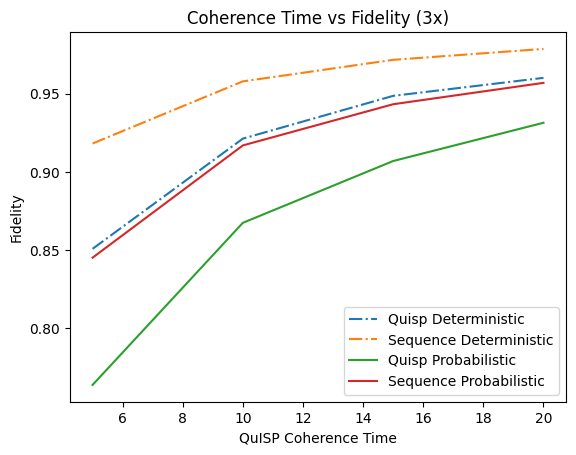

In [39]:
coherence_time = "5 10 15 20 25 30 45 60"

sequence_coherence_time_table = """
0.780281	0.880643	0.918153	0.937737	0.949762	0.957895	0.97166	0.978643
0.639016	0.7828	0.845138	0.879749	0.901737	0.916935	0.943271	0.956931
"""

quisp_coherence_time_table = """
0.850799	0.921281	0.94863	0.960133
0.763755	0.867437	0.906952	0.931416
"""

import matplotlib.pyplot as plt

# Split the coherence time string into a list of values
coherence_time_list = coherence_time.split()

# Convert the sequence_coherence_time_table and quisp_coherence_time_table strings into lists of lists
sequence_table_list = [line.split() for line in sequence_coherence_time_table.strip().split("\n")]
quisp_table_list = [line.split() for line in quisp_coherence_time_table.strip().split("\n")]

# Extract the x-axis values from the first column of the tables
x_values = [float(n) for n in coherence_time_list]
x_values_quisp = x_values[:4]
x_values_sequence = [3 * x for x in x_values_quisp]
# x_values_quisp = [4, 15]
# x_values_sequence = [20, 60]

# Extract the y-axis values for deterministic and probabilistic from the tables
sequence_deterministic = [float(n) for n in sequence_table_list[0]]
sequence_probabilistic = [float(n) for n in sequence_table_list[1]]
quisp_deterministic = [float(n) for n in quisp_table_list[0]]
quisp_probabilistic = [float(n) for n in quisp_table_list[1]]

coherence_time_to_index = {
    5.: 0,
    10.: 1,
    15.: 2,
    20.: 3,
    25.: 4,
    30.: 5,
    45.: 6,
    60.: 7
}
sequence_deterministic = [sequence_deterministic[coherence_time_to_index[t]] for t in x_values_sequence]
sequence_probabilistic = [sequence_probabilistic[coherence_time_to_index[t]] for t in x_values_sequence]

# Plot the data
plt.plot(x_values_quisp, quisp_deterministic[:len(x_values_quisp)], '-.', label='Quisp Deterministic')
plt.plot(x_values_quisp, sequence_deterministic[:len(x_values_quisp)], '-.', label='Sequence Deterministic')
plt.plot(x_values_quisp, quisp_probabilistic[:len(x_values_quisp)], label='Quisp Probabilistic')
plt.plot(x_values_quisp, sequence_probabilistic[:len(x_values_quisp)], label='Sequence Probabilistic')
# plt.plot(x_values[:len(quisp_deterministic)], quisp_deterministic, label='Quisp Deterministic')
# plt.plot(x_values[:len(sequence_deterministic)], sequence_deterministic, label='Sequence Deterministic')
# plt.plot(x_values[:len(quisp_probabilistic)], quisp_probabilistic, label='Quisp Probabilistic')
# plt.plot(x_values[:len(sequence_probabilistic)], sequence_probabilistic, label='Sequence Probabilistic')

# Add labels and title to the plot
plt.xlabel('QuISP Coherence Time')
plt.ylabel('Fidelity')
plt.title(f'Coherence Time vs Fidelity (3x)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

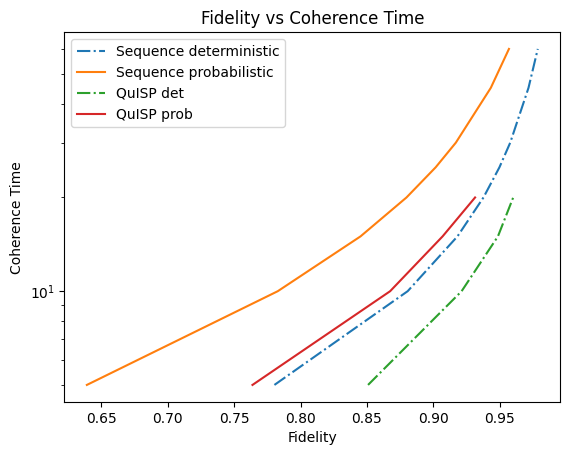

In [46]:
coherence_time = "5 10 15 20 25 30 45 60"

sequence_coherence_time_table = """
0.780281	0.880643	0.918153	0.937737	0.949762	0.957895	0.97166	0.978643
0.639016	0.7828	0.845138	0.879749	0.901737	0.916935	0.943271	0.956931
"""

quisp_coherence_time_table = """
0.850799	0.921281	0.94863	0.960133
0.763755	0.867437	0.906952	0.931416
"""

# Split the coherence time string into a list of values
coherence_time_list = coherence_time.split()

# Convert the sequence_coherence_time_table and quisp_coherence_time_table strings into lists of lists
sequence_table_list = [line.split() for line in sequence_coherence_time_table.strip().split("\n")]
quisp_table_list = [line.split() for line in quisp_coherence_time_table.strip().split("\n")]

# Extract the x-axis values from the first column of the tables
x_values = [float(n) for n in coherence_time_list]


# Extract the y-axis values for deterministic and probabilistic from the tables
sequence_deterministic = [float(n) for n in sequence_table_list[0]]
sequence_probabilistic = [float(n) for n in sequence_table_list[1]]
quisp_deterministic = [float(n) for n in quisp_table_list[0]]
quisp_probabilistic = [float(n) for n in quisp_table_list[1]]

# Plotting the data
plt.plot(sequence_deterministic, x_values[:len(sequence_deterministic)], '-.', label='Sequence deterministic')
plt.plot(sequence_probabilistic, x_values[:len(sequence_deterministic)], label='Sequence probabilistic')
plt.plot(quisp_deterministic, x_values[:len(quisp_deterministic)], '-.', label='QuISP det')
plt.plot(quisp_probabilistic, x_values[:len(quisp_deterministic)], label='QuISP prob')

# Adding labels and title
plt.xlabel('Fidelity')
plt.ylabel('Coherence Time')
plt.title('Fidelity vs Coherence Time')
# Set the y-axis to log scale# Adding legend
plt.yscale('log')
plt.legend()

# Display the plot
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def get_p_from_decoherence_time(decoherence_time_mu_s: int) -> float:
    left: float = 0.0
    right: float = 0.33
    iter_count = 0
    while left < right:
        p = (left + right) / 2
        iter_count += 1
        if iter_count > 100:
            print("exceed max iteration")
            break
        Q = np.matrix(
            [
                [1 - 3 * p, p, p, p],
                [p, 1 - 3 * p, p, p],
                [p, p, 1 - 3 * p, p],
                [p, p, p, 1 - 3 * p],
            ]
        )
        Qt = Q**decoherence_time_mu_s
        if Qt[0, 0] > 1 / np.e:
            left = p
        else:
            right = p
        if round(Qt[0, 0], 10) == round(1 / np.e, 10):
            break
    # print(f"we got p = {p}")
    # print(f"    expected: {1/np.e}")
    # print(f"    obtained: {Qt[0, 0]}")
    return p


def get_q_from_coherence_time(coherence_time_mu_s: int):
    p = get_p_from_decoherence_time(coherence_time_mu_s)
    Q = np.matrix(
        [
            [1 - 3 * p, p, p, p],
            [p, 1 - 3 * p, p, p],
            [p, p, 1 - 3 * p, p],
            [p, p, p, 1 - 3 * p],
        ]
    )
    return Q

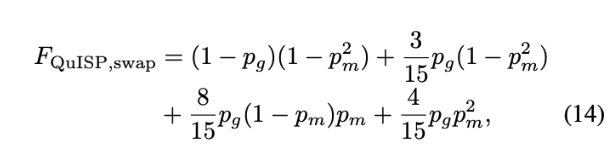

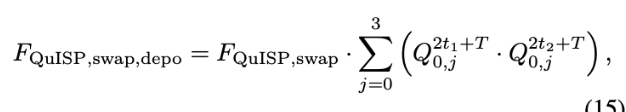

In [5]:
def swap_fidelity(pg: float, pm: float) -> float:
    return (1 - pg) * (1 - pm)**2 + 3/15 * pg * (1 - pm)**2 + 8/15 * pg * (1 - pm) * pm + 4/15 * pg * pm**2

def memory_depolarizing_swap_fidelity(pg, pm, t0: int, t1: int, coherence_time: int):
    fswap = swap_fidelity(pg, pm)
    Q = get_q_from_coherence_time(coherence_time)
    # Fix constant
    c = 208189.206944 # km/s
    L = 20 # km
    T = L / c # in s
    T_mus = int(T * 1_000_000) # in mu s
    Qt0 = np.linalg.matrix_power(Q, 2*t0 + T_mus)
    Qt1 = np.linalg.matrix_power(Q, 2*t1 + T_mus)
    # print(f'with coherence time: expected {1/np.e}')
    # print(np.linalg.matrix_power(Q, coherence_time))
    # fdepo = np.sum([Qt0[0, j] * Qt1[0, j] for j in range(3)])
    # fdepo = (Qt0 @ Qt1)[0, 0]
    fdepo = np.linalg.matrix_power(Q, 4*t0 + 2*T_mus)[0, 0]
    return fdepo * fswap

coherence_times = [i for i in range(5, 61)]
fidelities = []
for coh_t in coherence_times:
    c = 208189.206944 # km/s
    L = 20 # km
    T = L / c # in s
    t = T * 1000
    pg = pm = 0
    fidelities.append(memory_depolarizing_swap_fidelity(pg, pm, int(t), int(t), coh_t * 1_000))

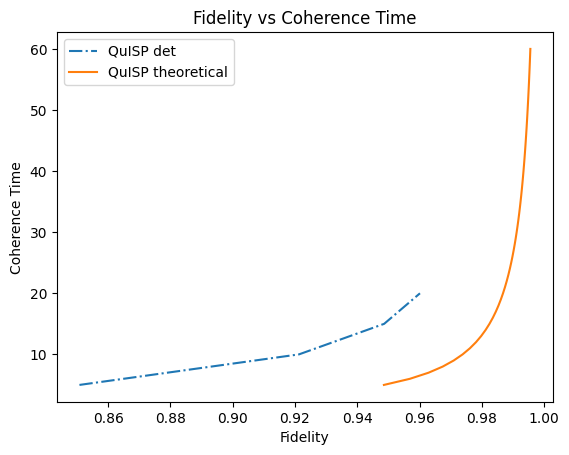

In [39]:
coherence_time = "5 10 15 20 25 30 45 60"

sequence_coherence_time_table = """
0.780281	0.880643	0.918153	0.937737	0.949762	0.957895	0.97166	0.978643
0.639016	0.7828	0.845138	0.879749	0.901737	0.916935	0.943271	0.956931
"""

quisp_coherence_time_table = """
0.850799	0.921281	0.94863	0.960133
0.763755	0.867437	0.906952	0.931416
"""

# Split the coherence time string into a list of values
coherence_time_list = coherence_time.split()

# Convert the sequence_coherence_time_table and quisp_coherence_time_table strings into lists of lists
sequence_table_list = [line.split() for line in sequence_coherence_time_table.strip().split("\n")]
quisp_table_list = [line.split() for line in quisp_coherence_time_table.strip().split("\n")]

# Extract the x-axis values from the first column of the tables
x_values = [float(n) for n in coherence_time_list]


# Extract the y-axis values for deterministic and probabilistic from the tables
sequence_deterministic = [float(n) for n in sequence_table_list[0]]
sequence_probabilistic = [float(n) for n in sequence_table_list[1]]
quisp_deterministic = [float(n) for n in quisp_table_list[0]]
quisp_probabilistic = [float(n) for n in quisp_table_list[1]]

# Plotting the data
# plt.plot(sequence_deterministic, x_values[:len(sequence_deterministic)], '-.', label='Sequence deterministic')
# plt.plot(sequence_probabilistic, x_values[:len(sequence_deterministic)], label='Sequence probabilistic')
plt.plot(quisp_deterministic, x_values[:len(quisp_deterministic)], '-.', label='QuISP det')
# plt.plot(quisp_probabilistic, x_values[:len(quisp_deterministic)], label='QuISP prob')
plt.plot(fidelities, [x for x in coherence_times], label='QuISP theoretical')

# Adding labels and title
plt.xlabel('Fidelity')
plt.ylabel('Coherence Time')
plt.title('Fidelity vs Coherence Time')
# Set the y-axis to log scale# Adding legend
# plt.yscale('log')
# plt.xscale('log')
plt.legend()

# Display the plot
plt.show()


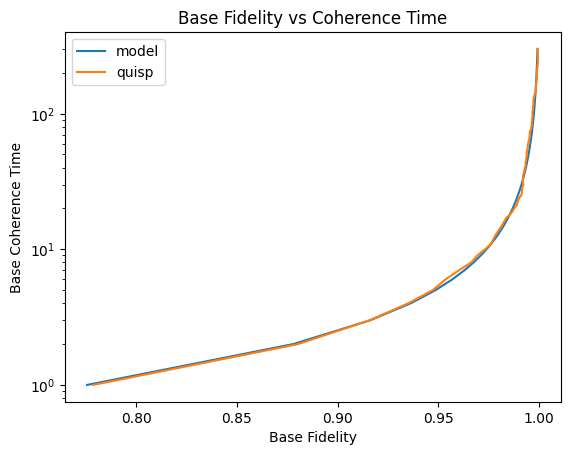

In [48]:
import numpy as np

quisp_data = [
    0.778744,
    0.88038,
    0.915885,
    0.935094,
    0.947182,
    0.953498,
    0.960168,
    0.9663,
    0.969236,
    0.973148,
    0.975991,
    0.977411,
    0.978656,
    0.980167,
    0.981501,
    0.982569,
    0.983548,
    0.985504,
    0.986661,
    0.987549,
    0.988795,
    0.989151,
    0.989596,
    0.990131,
    0.99102,
    0.991376,
    0.991376,
    0.991464,
    0.99182,
    0.992087,
    0.99182,
    0.991909,
    0.991909,
    0.992086,
    0.991996,
    0.992263,
    0.992352,
    0.99262,
    0.992797,
    0.992886,
    0.993152,
    0.993241,
    0.99324,
    0.993241,
    0.993419,
    0.993508,
    0.993597,
    0.993687,
    0.993687,
    0.993864,
    0.993597,
    0.993776,
    0.993954,
    0.994042,
    0.994131,
    0.994309,
    0.994309,
    0.994308,
    0.994309,
    0.994576,
    0.994577,
    0.994577,
    0.994755,
    0.994844,
    0.995111,
    0.995111,
    0.995111,
    0.995111,
    0.995289,
    0.995201,
    0.995378,
    0.995289,
    0.995289,
    0.995378,
    0.995467,
    0.995822,
    0.996,
    0.996,
    0.996,
    0.996089,
    0.996267,
    0.996267,
    0.996267,
    0.996267,
    0.996267,
    0.996267,
    0.996445,
    0.996444,
    0.996444,
    0.996444,
    0.996444,
    0.996444,
    0.996533,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996711,
    0.996799,
    0.996888,
    0.996888,
    0.996799,
    0.996799,
    0.996888,
    0.996888,
    0.996888,
    0.996888,
    0.996976,
    0.997155,
    0.997155,
    0.997155,
    0.997155,
    0.997065,
    0.997065,
    0.997065,
    0.997065,
    0.997065,
    0.997065,
    0.997155,
    0.997244,
    0.997244,
    0.997244,
    0.997332,
    0.997332,
    0.997422,
    0.997422,
    0.99751,
    0.99751,
    0.997599,
    0.997688,
    0.997688,
    0.997688,
    0.997777,
    0.997865,
    0.997954,
    0.998132,
    0.998221,
    0.998221,
    0.998221,
    0.998221,
    0.998221,
    0.998221,
    0.998221,
    0.99831,
    0.99831,
    0.99831,
    0.998221,
    0.998221,
    0.998221,
    0.998221,
    0.99831,
    0.998399,
    0.998399,
    0.998399,
    0.998399,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998666,
    0.998666,
    0.998666,
    0.998666,
    0.998755,
    0.998755,
    0.998755,
    0.998844,
    0.998844,
    0.998844,
    0.998844,
    0.998844,
    0.998844,
    0.998844,
    0.998844,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998932,
    0.998932,
    0.998932,
    0.998932,
    0.998932,
    0.998932,
    0.999021,
    0.999021,
    0.999021,
    0.999021,
    0.999021,
    0.999109,
    0.999109,
    0.999109,
    0.999109,
    0.999109,
    0.999109,
    0.999109,
    0.999109,
    0.999109,
    0.999109,
    0.999199,
    0.999199,
    0.999199,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999377,
    0.999377,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
]

base_coherence_time = [i for i in range(1, 301)]
base_fidelity = []

for ct in base_coherence_time:
    Q = get_q_from_coherence_time(ct * 1000)
    c = 208189.206944 # km/s
    L = 20 # km
    T = L / c # in s
    T_mus = int(T * 1_000_000) # in mu s
    base_fidelity.append(np.linalg.matrix_power(Q, 2 * T_mus)[0, 0])

plt.plot(base_fidelity, base_coherence_time, label='model')
plt.plot(quisp_data, base_coherence_time, label='quisp')
plt.xlabel('Base Fidelity')
plt.ylabel('Base Coherence Time')
plt.title('Base Fidelity vs Coherence Time')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
quisp_data = [
    0.778744,
    0.88038,
    0.915885,
    0.935094,
    0.947182,
    0.953498,
    0.960168,
    0.9663,
    0.969236,
    0.973148,
    0.975991,
    0.977411,
    0.978656,
    0.980167,
    0.981501,
    0.982569,
    0.983548,
    0.985504,
    0.986661,
    0.987549,
    0.988795,
    0.989151,
    0.989596,
    0.990131,
    0.99102,
    0.991376,
    0.991376,
    0.991464,
    0.99182,
    0.992087,
    0.99182,
    0.991909,
    0.991909,
    0.992086,
    0.991996,
    0.992263,
    0.992352,
    0.99262,
    0.992797,
    0.992886,
    0.993152,
    0.993241,
    0.99324,
    0.993241,
    0.993419,
    0.993508,
    0.993597,
    0.993687,
    0.993687,
    0.993864,
    0.993597,
    0.993776,
    0.993954,
    0.994042,
    0.994131,
    0.994309,
    0.994309,
    0.994308,
    0.994309,
    0.994576,
    0.994577,
    0.994577,
    0.994755,
    0.994844,
    0.995111,
    0.995111,
    0.995111,
    0.995111,
    0.995289,
    0.995201,
    0.995378,
    0.995289,
    0.995289,
    0.995378,
    0.995467,
    0.995822,
    0.996,
    0.996,
    0.996,
    0.996089,
    0.996267,
    0.996267,
    0.996267,
    0.996267,
    0.996267,
    0.996267,
    0.996445,
    0.996444,
    0.996444,
    0.996444,
    0.996444,
    0.996444,
    0.996533,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996621,
    0.996711,
    0.996799,
    0.996888,
    0.996888,
    0.996799,
    0.996799,
    0.996888,
    0.996888,
    0.996888,
    0.996888,
    0.996976,
    0.997155,
    0.997155,
    0.997155,
    0.997155,
    0.997065,
    0.997065,
    0.997065,
    0.997065,
    0.997065,
    0.997065,
    0.997155,
    0.997244,
    0.997244,
    0.997244,
    0.997332,
    0.997332,
    0.997422,
    0.997422,
    0.99751,
    0.99751,
    0.997599,
    0.997688,
    0.997688,
    0.997688,
    0.997777,
    0.997865,
    0.997954,
    0.998132,
    0.998221,
    0.998221,
    0.998221,
    0.998221,
    0.998221,
    0.998221,
    0.998221,
    0.99831,
    0.99831,
    0.99831,
    0.998221,
    0.998221,
    0.998221,
    0.998221,
    0.99831,
    0.998399,
    0.998399,
    0.998399,
    0.998399,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998488,
    0.998666,
    0.998666,
    0.998666,
    0.998666,
    0.998755,
    0.998755,
    0.998755,
    0.998844,
    0.998844,
    0.998844,
    0.998844,
    0.998844,
    0.998844,
    0.998844,
    0.998844,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998755,
    0.998932,
    0.998932,
    0.998932,
    0.998932,
    0.998932,
    0.998932,
    0.999021,
    0.999021,
    0.999021,
    0.999021,
    0.999021,
    0.999109,
    0.999109,
    0.999109,
    0.999109,
    0.999109,
    0.999109,
    0.999109,
    0.999109,
    0.999109,
    0.999109,
    0.999199,
    0.999199,
    0.999199,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999377,
    0.999377,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999288,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
    0.999198,
]

In [ ]:
quisp_swap_data = [
    0.412255,
    0.538643,
    0.590533,
    0.627764,
    0.653222,
    0.669326,
    0.678146,
    0.684461,
    0.692387,
    0.697971,
    0.704353,
    0.707496,
    0.710987,
    0.715394,
    0.717999,
    0.7215,
    0.722848,
    0.724459,
    0.725807,
    0.727606,
    0.727887,
    0.728247,
    0.729961,
    0.730602,
    0.731498,
    0.732762,
    0.732952,
    0.733577,
    0.734028,
    0.734115,
    0.735017,
    0.735193,
    0.735458,
    0.73609,
    0.736717,
    0.737521,
    0.738329,
    0.738873,
    0.738878,
    0.739321,
    0.739859,
    0.740308,
    0.740129,
    0.740848,
    0.741482,
    0.742021,
    0.742111,
    0.74247,
    0.742469,
    0.742919,
    0.743008,
    0.743549,
    0.743816,
    0.743816,
    0.743728,
    0.743908,
    0.743907,
    0.744083,
    0.744442,
    0.744352,
    0.744442,
    0.744983,
    0.745072,
    0.745344,
    0.745342,
    0.745344,
    0.745167,
    0.744987,
    0.745167,
    0.744807,
    0.745077,
    0.744897,
    0.74508,
    0.74544,
    0.74535,
    0.745529,
    0.745529,
    0.745529,
    0.745438,
    0.745438,
    0.745348,
    0.745259,
    0.745349,
    0.745167,
    0.745438,
    0.745617,
    0.745617,
    0.745439,
    0.74544,
    0.745529,
    0.745531,
    0.745349,
    0.74535,
    0.745352,
    0.745443,
    0.745622,
    0.745891,
    0.745982,
    0.746253,
    0.746611,
]

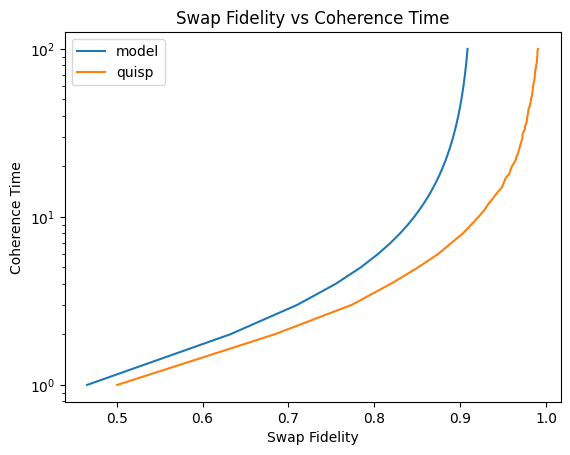

In [58]:
import numpy as np

quisp_swap_data = [
    0.50065,
    0.683724,
    0.773996,
    0.819263,
    0.850799,
    0.873931,
    0.889733,
    0.903416,
    0.913013,
    0.921281,
    0.928267,
    0.93312,
    0.938678,
    0.943439,
    0.94863,
    0.950858,
    0.952922,
    0.956987,
    0.958699,
    0.960133,
    0.962998,
    0.964799,
    0.965784,
    0.967496,
    0.968303,
    0.969376,
    0.970193,
    0.971089,
    0.972251,
    0.97252,
    0.972694,
    0.973596,
    0.975128,
    0.975482,
    0.975752,
    0.976923,
    0.97755,
    0.977901,
    0.97798,
    0.978511,
    0.978787,
    0.979233,
    0.979413,
    0.979683,
    0.980486,
    0.981113,
    0.981559,
    0.981828,
    0.982193,
    0.982462,
    0.982639,
    0.983354,
    0.983705,
    0.983974,
    0.984234,
    0.984142,
    0.984496,
    0.984677,
    0.984861,
    0.984956,
    0.985225,
    0.985487,
    0.985756,
    0.986022,
    0.98638,
    0.986472,
    0.986649,
    0.986921,
    0.986833,
    0.987019,
    0.986931,
    0.987197,
    0.987374,
    0.987459,
    0.987459,
    0.987902,
    0.988263,
    0.98826,
    0.988349,
    0.988526,
    0.988792,
    0.988972,
    0.989241,
    0.989418,
    0.989418,
    0.989507,
    0.989504,
    0.989504,
    0.989681,
    0.989684,
    0.990042,
    0.989953,
    0.989865,
    0.989953,
    0.989953,
    0.989861,
    0.990038,
    0.990216,
    0.990396,
    0.990668,
]

base_coherence_time = [i for i in range(1, 101)]
perfect_swap_fidelity = []

for ct in base_coherence_time:
    Q = get_q_from_coherence_time(ct * 1000)
    c = 208189.206944 # km/s
    L = 20 # km
    T = L / c # in s
    T_mus = int(T * 1_000_000) # in mu s
    perfect_swap_fidelity.append(swap_fidelity(0.1, 0.1) * np.linalg.matrix_power(Q, 6 * T_mus)[0, 0])
    # print(swap_fidelity(0, 0))
    # perfect_swap_fidelity.append(memory_depolarizing_swap_fidelity(0, 0, T_mus, T_mus, ct))

plt.plot(perfect_swap_fidelity, base_coherence_time, label='model')
plt.plot(quisp_swap_data, base_coherence_time, label='quisp')
plt.xlabel('Swap Fidelity')
plt.ylabel('Coherence Time')
plt.title('Swap Fidelity vs Coherence Time')
plt.yscale('log')
plt.legend()
plt.show()

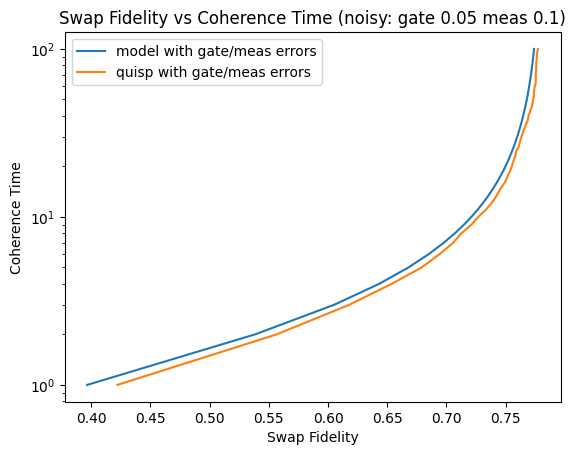

In [19]:
import numpy as np

quisp_swap_raw = """
0.422102
0.556663
0.617909
0.653886
0.678974
0.694081
0.705469
0.712637
0.72103
0.726882
0.733007
0.73768
0.741218
0.743895
0.746254
0.749203
0.750927
0.752379
0.753876
0.755191
0.755963
0.757052
0.75814
0.758503
0.759275
0.760908
0.761362
0.762133
0.762587
0.763312
0.764084
0.764583
0.765309
0.766034
0.766715
0.76735
0.768257
0.768666
0.769074
0.769165
0.7698
0.770435
0.770753
0.771433
0.771887
0.772295
0.772386
0.772885
0.772885
0.773293
0.773429
0.773701
0.773838
0.773838
0.773747
0.774019
0.77411
0.774155
0.774382
0.774654
0.774836
0.775289
0.775335
0.77538
0.775335
0.77538
0.775335
0.77538
0.775471
0.775153
0.77538
0.77538
0.775562
0.775743
0.775698
0.775698
0.775698
0.775698
0.775652
0.775879
0.775879
0.775788
0.775879
0.775788
0.77597
0.776106
0.776242
0.776151
0.776242
0.776288
0.776424
0.776333
0.776288
0.776333
0.776469
0.776696
0.776923
0.777059
0.777104
0.777286
"""

# print(quisp_swap_raw.split('\n'))
quisp_swap_data = [float(x) for x in quisp_swap_raw.strip().split('\n')]


base_coherence_time = [i for i in range(1, 101)]
perfect_swap_fidelity = []

for ct in base_coherence_time:
    Q = get_q_from_coherence_time(ct * 1000)
    c = 208189.206944 # km/s
    L = 20 # km
    T = L / c # in s
    T_mus = int(T * 1_000_000) # in mu s
    perfect_swap_fidelity.append(swap_fidelity(0.05, 0.1) * np.linalg.matrix_power(Q, 6 * T_mus)[0, 0])
    # print(swap_fidelity(0, 0))
    # perfect_swap_fidelity.append(memory_depolarizing_swap_fidelity(0, 0, T_mus, T_mus, ct))

plt.plot(perfect_swap_fidelity, base_coherence_time, label='model with gate/meas errors')
plt.plot(quisp_swap_data, base_coherence_time, label='quisp with gate/meas errors')
plt.xlabel('Swap Fidelity')
plt.ylabel('Coherence Time')
plt.title('Swap Fidelity vs Coherence Time (noisy: gate 0.05 meas 0.1)')
plt.yscale('log')
plt.legend()
plt.show()

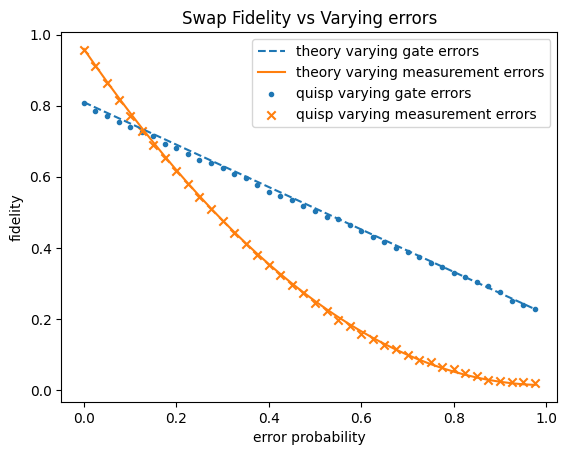

In [42]:
raw_meas_error_data_005_cnot = """
0.957816
0.911393
0.863083
0.817409
0.770267
0.729268
0.690269
0.652525
0.61631
0.580471
0.544276
0.508804
0.474157
0.442025
0.409753
0.37916
0.350675
0.322703
0.295817
0.27183
0.245693
0.221176
0.197755
0.178739
0.157219
0.142526
0.125685
0.115704
0.0976513
0.0842797
0.0774456
0.065775
0.0579837
0.0464192
0.0393698
0.0289067
0.0256266
0.0209988
0.0212456
0.0189033
"""
raw_cnot_error_data_01_meas = """
0.808677
0.784153
0.770267
0.754543
0.741361
0.724928
0.714638
0.692773
0.679707
0.663539
0.647652
0.638091
0.624374
0.608285
0.595708
0.577384
0.558426
0.544901
0.533346
0.51718
0.502433
0.487815
0.480012
0.463775
0.447451
0.430491
0.416139
0.39837
0.386982
0.373245
0.356378
0.345
0.327823
0.318611
0.30371
0.292417
0.27429
0.251124
0.237566
0.227544
"""

# print(quisp_swap_raw.split('\n'))
quisp_cnot_error_data = [float(x) for x in raw_cnot_error_data_01_meas.strip().split("\n")]
quisp_meas_error_data = [float(x) for x in raw_meas_error_data_005_cnot.strip().split("\n")]


error_probs = [np.round(i, 3) for i in np.arange(0, 1, 0.025)]

plt.plot(error_probs, [swap_fidelity(p, 0.1) for p in error_probs], '--', label="theory varying gate errors")
plt.plot(error_probs, [swap_fidelity(0.05, p) for p in error_probs], label="theory varying measurement errors")
# plt.plot(error_probs, quisp_cnot_error_data, label='model gates')
plt.scatter(error_probs, quisp_cnot_error_data, marker='.', label="quisp varying gate errors")
plt.scatter(error_probs, quisp_meas_error_data, marker='x', label="quisp varying measurement errors")
plt.xlabel("error probability")
plt.ylabel("fidelity")
plt.title("Swap Fidelity vs Varying errors")
plt.legend()
plt.show()

/var/folders/0j/tsyg7r_n3r75zkk3lg02j88c0000gn/T/ipykernel_44678/1866590598.py:232: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


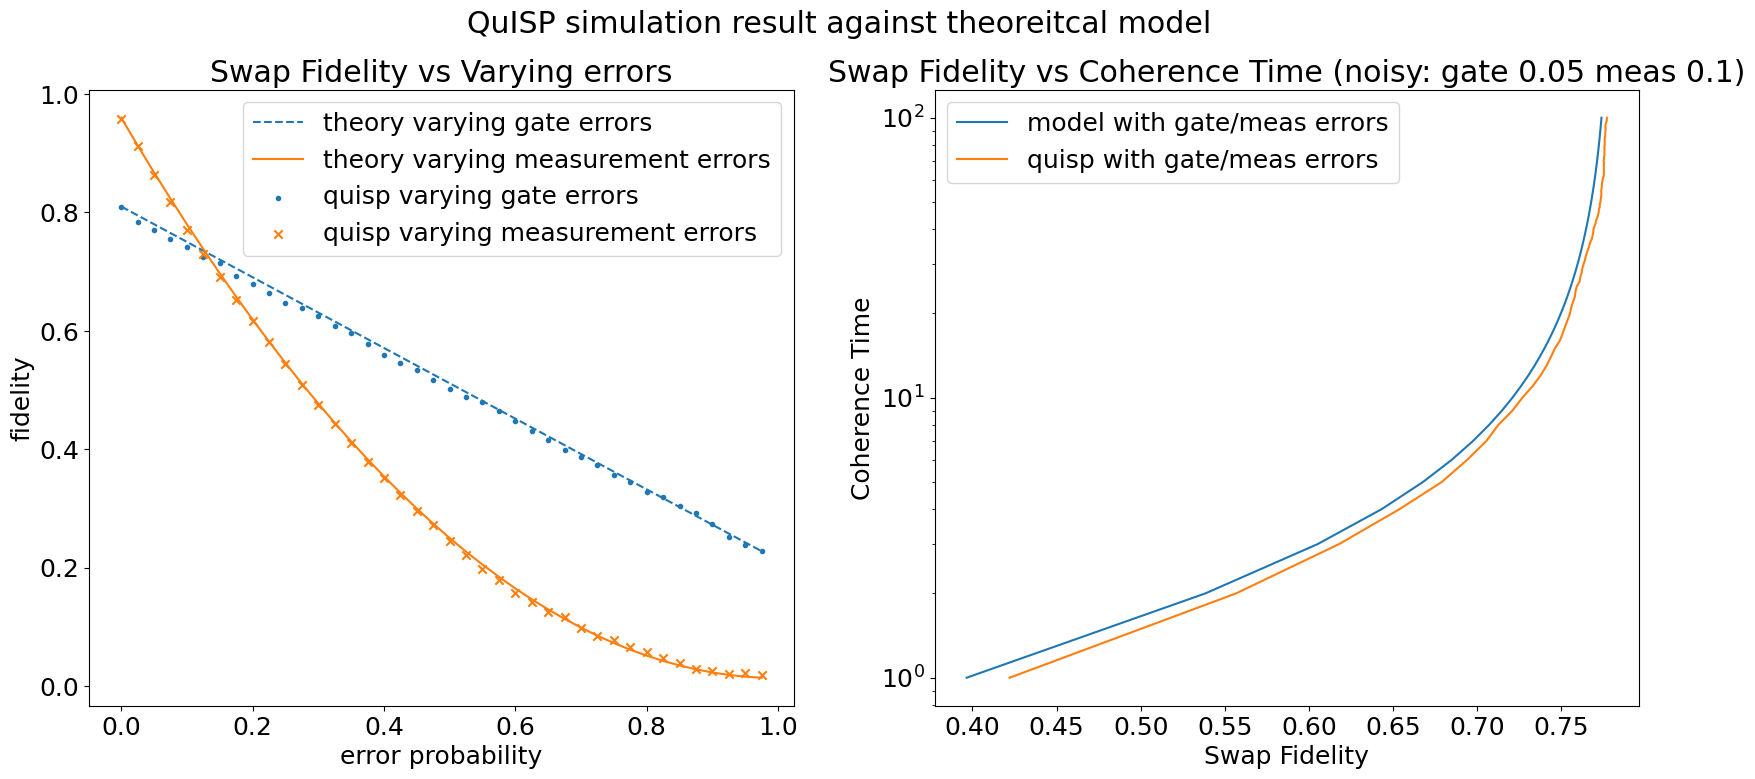

In [52]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})

def swap_fidelity(pg: float, pm: float) -> float:
    return (1 - pg) * (1 - pm)**2 + 3/15 * pg * (1 - pm)**2 + 8/15 * pg * (1 - pm) * pm + 4/15 * pg * pm**2

def memory_depolarizing_swap_fidelity(pg, pm, t0: int, t1: int, coherence_time: int):
    fswap = swap_fidelity(pg, pm)
    Q = get_q_from_coherence_time(coherence_time)
    # Fix constant
    c = 208189.206944 # km/s
    L = 20 # km
    T = L / c # in s
    T_mus = int(T * 1_000_000) # in mu s
    Qt0 = np.linalg.matrix_power(Q, 2*t0 + T_mus)
    Qt1 = np.linalg.matrix_power(Q, 2*t1 + T_mus)
    # print(f'with coherence time: expected {1/np.e}')
    # print(np.linalg.matrix_power(Q, coherence_time))
    # fdepo = np.sum([Qt0[0, j] * Qt1[0, j] for j in range(3)])
    # fdepo = (Qt0 @ Qt1)[0, 0]
    fdepo = np.linalg.matrix_power(Q, 4*t0 + 2*T_mus)[0, 0]
    return fdepo * fswap

quisp_swap_raw = """
0.422102
0.556663
0.617909
0.653886
0.678974
0.694081
0.705469
0.712637
0.72103
0.726882
0.733007
0.73768
0.741218
0.743895
0.746254
0.749203
0.750927
0.752379
0.753876
0.755191
0.755963
0.757052
0.75814
0.758503
0.759275
0.760908
0.761362
0.762133
0.762587
0.763312
0.764084
0.764583
0.765309
0.766034
0.766715
0.76735
0.768257
0.768666
0.769074
0.769165
0.7698
0.770435
0.770753
0.771433
0.771887
0.772295
0.772386
0.772885
0.772885
0.773293
0.773429
0.773701
0.773838
0.773838
0.773747
0.774019
0.77411
0.774155
0.774382
0.774654
0.774836
0.775289
0.775335
0.77538
0.775335
0.77538
0.775335
0.77538
0.775471
0.775153
0.77538
0.77538
0.775562
0.775743
0.775698
0.775698
0.775698
0.775698
0.775652
0.775879
0.775879
0.775788
0.775879
0.775788
0.77597
0.776106
0.776242
0.776151
0.776242
0.776288
0.776424
0.776333
0.776288
0.776333
0.776469
0.776696
0.776923
0.777059
0.777104
0.777286
"""

quisp_swap_data = [float(x) for x in quisp_swap_raw.strip().split('\n')]

base_coherence_time = [i for i in range(1, 101)]
perfect_swap_fidelity = []

for ct in base_coherence_time:
    Q = get_q_from_coherence_time(ct * 1000)
    c = 208189.206944 # km/s
    L = 20 # km
    T = L / c # in s
    T_mus = int(T * 1_000_000) # in mu s
    perfect_swap_fidelity.append(swap_fidelity(0.05, 0.1) * np.linalg.matrix_power(Q, 6 * T_mus)[0, 0])

raw_meas_error_data_005_cnot = """
0.957816
0.911393
0.863083
0.817409
0.770267
0.729268
0.690269
0.652525
0.61631
0.580471
0.544276
0.508804
0.474157
0.442025
0.409753
0.37916
0.350675
0.322703
0.295817
0.27183
0.245693
0.221176
0.197755
0.178739
0.157219
0.142526
0.125685
0.115704
0.0976513
0.0842797
0.0774456
0.065775
0.0579837
0.0464192
0.0393698
0.0289067
0.0256266
0.0209988
0.0212456
0.0189033
"""
raw_cnot_error_data_01_meas = """
0.808677
0.784153
0.770267
0.754543
0.741361
0.724928
0.714638
0.692773
0.679707
0.663539
0.647652
0.638091
0.624374
0.608285
0.595708
0.577384
0.558426
0.544901
0.533346
0.51718
0.502433
0.487815
0.480012
0.463775
0.447451
0.430491
0.416139
0.39837
0.386982
0.373245
0.356378
0.345
0.327823
0.318611
0.30371
0.292417
0.27429
0.251124
0.237566
0.227544
"""

quisp_cnot_error_data = [float(x) for x in raw_cnot_error_data_01_meas.strip().split("\n")]
quisp_meas_error_data = [float(x) for x in raw_meas_error_data_005_cnot.strip().split("\n")]
error_probs = [np.round(i, 3) for i in np.arange(0, 1, 0.025)]

fig, (ax2, ax1) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('QuISP simulation result against theoreitcal model')

ax1.plot(perfect_swap_fidelity, base_coherence_time, label='model with gate/meas errors')
ax1.plot(quisp_swap_data, base_coherence_time, label='quisp with gate/meas errors')
ax1.set_xlabel('Swap Fidelity')
ax1.set_ylabel('Coherence Time')
ax1.set_title('Swap Fidelity vs Coherence Time (noisy: gate 0.05 meas 0.1)')
ax1.set_yscale('log')

ax2.plot(error_probs, [swap_fidelity(p, 0.1) for p in error_probs], '--', label="theory varying gate errors")
ax2.plot(error_probs, [swap_fidelity(0.05, p) for p in error_probs], label="theory varying measurement errors")
# ax2.plot(error_probs, quisp_cnot_error_data, label='model gates')
ax2.scatter(error_probs, quisp_cnot_error_data, marker='.', label="quisp varying gate errors")
ax2.scatter(error_probs, quisp_meas_error_data, marker='x', label="quisp varying measurement errors")
ax2.set_xlabel("error probability")
ax2.set_ylabel("fidelity")
ax2.set_title("Swap Fidelity vs Varying errors")

ax1.legend()
ax2.legend()
fig.show()